In [1]:
#importing required libraries
import pandas as pd
import numpy as np

In [2]:
#Reading the dataset containing user details
cols=["user_id","age","gender","occupation","zip_code"]
users=pd.read_csv('C:/Users/Administrator/Desktop/gramener/movie recommendation system/ml-100k/u.user',sep='|',names=cols)

In [3]:
#first few records of user dataset
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
#loading the dataset containing occupation names
cols=["occupation"]
occupation=pd.read_csv('C:/Users/Administrator/Desktop/gramener/movie recommendation system/ml-100k/u.occupation',sep='|',names=cols)

In [5]:
#printing first 5 records of occupation dataset
occupation.head()

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [6]:
#dataset containing different genres
cols=["id"]
genre=pd.read_csv('C:/Users/Administrator/Desktop/gramener/movie recommendation system/ml-100k/u.genre',sep='|',names=cols)
#genre.set_index("id",inplace=True)

In [7]:
#first five records of genre dataset
genre.head()

,id
unknown,0
Action,1
Adventure,2
Animation,3
Children's,4


In [8]:
#loading the dataset containing information about movies

cols=["movie_title","release_date","video_release_date","IMDB_url","unknown","action","adventure","animation","childrens","comedy","crime","documentary","drama","fantasy","film-noir","horror","musical","mystery","romance","sci-fi","thriller","war","western"]

movies1=pd.read_csv('C:/Users/Administrator/Desktop/gramener/movie recommendation system/ml-100k/u.item',encoding="Latin-1",sep='|',names=cols)

In [9]:
#printing the first five records of movies dataset
movies1.head()

,movie_title,release_date,video_release_date,IMDB_url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
#dataset showing the count of users,items and ratings
count=pd.read_csv('C:/Users/Administrator/Desktop/gramener/movie recommendation system/ml-100k/u.info',sep='|',names=["count","category"])
count.head()

,count,category
0,943 users,NaN
1,1682 items,NaN
2,100000 ratings,NaN


In [11]:
#the dataset containing which users have rated which movies and the rating score
cols=["userid","itemid","rating","timestamp"]
ratings_users_items=pd.read_csv('C:/Users/Administrator/Desktop/gramener/movie recommendation system/ml-100k/u.data',sep='\t',names=cols)

In [12]:
#printing the first five records of rating dataset
ratings_users_items.head()

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
#users dataset
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
#checking for Nan values
users.isna().sum()/len(users.user_id)

user_id       0.0
age           0.0
gender        0.0
occupation    0.0
zip_code      0.0
dtype: float64

In [15]:
#therefore we see that there are no Nan values in the users dataset

In [16]:
#checking for outliers

In [17]:
import seaborn as sns
sns.boxplot(x=users["age"])

In [18]:
#treating outlier values in age using capping method

In [19]:
users["age"].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [20]:
capped_value_age=43+1.5*(43-25)
capped_value_age

70.0

In [21]:
users["age"]=np.where((users["age"]>capped_value_age),capped_value_age,users["age"])

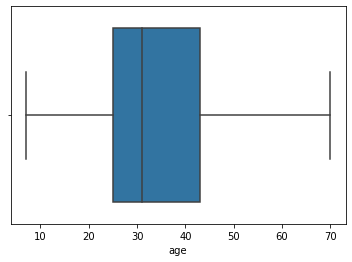

In [22]:
#checking whether capping is done right

import seaborn as sns
sns.boxplot(x=users["age"])

In [23]:
#checking for Nan values in movies
movies1.isna().sum()/len(movies1.movie_title)*100

movie_title             0.000000
release_date            0.059453
video_release_date    100.000000
IMDB_url                0.178359
unknown                 0.000000
action                  0.000000
adventure               0.000000
animation               0.000000
childrens               0.000000
comedy                  0.000000
crime                   0.000000
documentary             0.000000
drama                   0.000000
fantasy                 0.000000
film-noir               0.000000
horror                  0.000000
musical                 0.000000
mystery                 0.000000
romance                 0.000000
sci-fi                  0.000000
thriller                0.000000
war                     0.000000
western                 0.000000
dtype: float64

In [24]:
#we see that video release date has 100 percent of nan values and therefore drop the entire column
#IBDM url has no significance and therefore it is also dropped.

In [25]:
movies1.drop(columns=["video_release_date","IMDB_url"],inplace=True)

In [26]:
movies1.head()

,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#applying apriori algorithm
movies1=movies1.reset_index()

In [28]:
movies1.rename(columns={"index":"movie_id"},inplace=True)

In [29]:
merged=pd.merge(users,ratings_users_items,left_on="user_id",right_on="userid")

In [30]:
final_merge=pd.merge(merged,movies1,left_on="itemid",right_on="movie_id")

In [31]:
final_merge.head()

,user_id,age,gender,occupation,zip_code,userid,itemid,rating,timestamp,movie_id,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,24.0,M,technician,85711,1,61,4,878542420,61,...,0,0,0,0,0,0,0,0,0,0
1,13,47.0,M,educator,29206,13,61,4,882140552,61,...,0,0,0,0,0,0,0,0,0,0
2,18,35.0,F,other,37212,18,61,4,880130803,61,...,0,0,0,0,0,0,0,0,0,0
3,58,27.0,M,programmer,52246,58,61,5,884305271,61,...,0,0,0,0,0,0,0,0,0,0
4,59,49.0,M,educator,08403,59,61,4,888204597,61,...,0,0,0,0,0,0,0,0,0,0


In [32]:
final_merge.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', 'userid',
       'itemid', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'unknown', 'action', 'adventure', 'animation',
       'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi',
       'thriller', 'war', 'western'],
      dtype='object')

In [33]:
tab=final_merge[['user_id','unknown', 'action', 'adventure', 'animation',
       'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi',
       'thriller', 'war', 'western']]

In [34]:
d={}
for i in range(1,100000):
    t1=tab[tab["user_id"]==i][['unknown', 'action', 'adventure', 'animation',
       'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi',
       'thriller', 'war', 'western']].sum()
    t1=pd.DataFrame(t1)
    t1.reset_index(inplace=True)
    t1.rename(columns={"index":"genre",0:"sum1"},inplace=True)
    t1["genre"]=np.where(t1["sum1"]>np.mean(t1["sum1"]),t1["genre"],np.nan)
    d[i]=list(t1["genre"])
    

In [35]:
tab=pd.DataFrame(d)

In [36]:
result=tab.transpose()

In [37]:
result


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,NaN,action,adventure,NaN,NaN,comedy,NaN,NaN,drama,NaN,NaN,NaN,NaN,NaN,romance,sci-fi,thriller,NaN,NaN
2,NaN,action,NaN,NaN,NaN,comedy,crime,NaN,drama,NaN,NaN,NaN,NaN,NaN,romance,NaN,thriller,NaN,NaN
3,NaN,action,NaN,NaN,NaN,comedy,crime,NaN,drama,NaN,NaN,NaN,NaN,mystery,NaN,sci-fi,thriller,NaN,NaN
4,NaN,action,adventure,NaN,NaN,comedy,crime,NaN,drama,NaN,NaN,NaN,NaN,mystery,romance,sci-fi,thriller,NaN,NaN
5,NaN,action,adventure,NaN,childrens,comedy,NaN,NaN,drama,NaN,NaN,horror,NaN,NaN,NaN,sci-fi,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#applying apriori algorithm
ls=[]
for i in range(1,99999):
    d=result.iloc[i,:]
    items=[]
    for i in d:
        if(str(i)!="nan"):
            items.append(i)
    ls.append(items)
len(ls)

99998

In [39]:
from apyori import apriori
association_rules=apriori(ls,min_support=0.0045,min_confidence=0.2,min_lift=3.0,max_length=3)
association_results=list(association_rules)
print(len(association_results))

49


In [40]:
association_results[1].items

frozenset({'action', 'comedy'})

In [41]:
#items,antecedent,consequent,support,confidence,lift
it=[]
support_value=[]
antecedents=[]
consequents=[]
confidence=[]
lift=[]
for i in range(0,23):
    it.append(association_results[i].items)
    support_value.append(association_results[i].support)
    for j in range(0,1):
        antecedents.append(association_results[i].ordered_statistics[j].items_base)
        consequents.append(association_results[i].ordered_statistics[j].items_add)
        confidence.append(association_results[i].ordered_statistics[j].confidence)
        lift.append(association_results[i].ordered_statistics[j].lift)
    

In [42]:
table=pd.DataFrame({"Itemset":it,"Antecedent":antecedents,"Consequent":consequents,"Support":support_value,
                    "Confidence":confidence,"Lift":lift})

In [43]:
table

,Itemset,Antecedent,Consequent,Support,Confidence,Lift
0,"(adventure, action)",(action),(adventure),0.00519,0.595867,113.930192
1,"(comedy, action)",(action),(comedy),0.00810,0.929966,105.796013
2,"(drama, action)",(action),(drama),0.00864,0.991963,106.203792
3,"(romance, action)",(action),(romance),0.00791,0.908152,105.596905
4,"(sci-fi, action)",(action),(sci-fi),0.00530,0.608496,113.523099
5,"(action, thriller)",(action),(thriller),0.00818,0.939150,108.695789
6,"(adventure, comedy)",(adventure),(comedy),0.00493,0.942639,107.237744
7,"(adventure, drama)",(adventure),(drama),0.00515,0.984704,105.426546
8,"(adventure, romance)",(adventure),(romance),0.00474,0.906310,105.382747
9,"(adventure, thriller)",(adventure),(thriller),0.00485,0.927342,107.329133


In [44]:
#applying Kmeans Clustering
from sklearn.cluster import KMeans

In [45]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24.0,M,technician,85711
1,2,53.0,F,other,94043
2,3,23.0,M,writer,32067
3,4,24.0,M,technician,43537
4,5,33.0,F,other,15213


In [46]:
#converting categorical variables to numerical

In [47]:
users["gender"]=users["gender"].map(users["gender"].value_counts())

In [48]:
users["occupation"]=users["occupation"].map(users["occupation"].value_counts())

In [49]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
users["gender"]=le.fit_transform(users["gender"])
users["occupation"]=le.fit_transform(users["occupation"])

In [50]:
users.set_index("user_id",inplace=True)

In [51]:
X=users.iloc[:,:-1].values

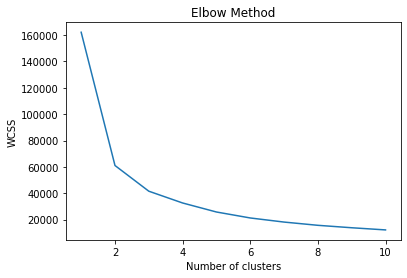

In [52]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 1 2 2 0 0 1 0 2 1 0 2 1 1 1 2 0 0 0 0 2 2 0 2 0 1 0 0 0 2 2 2 2 0 2 2 2
 2 0 0 0 0 0 2 0 0 1 1 2 2 2 2 2 2 0 2 2 2 1 1 0 2 0 0 1 2 2 2 2 2 0 1 2 0
 2 2 0 2 0 0 2 1 0 0 1 2 1 1 1 1 1 0 1 2 0 2 1 1 2 0 2 0 2 2 2 1 0 1 2 2 1
 0 1 2 0 0 2 2 0 1 1 0 1 0 0 0 0 2 0 2 1 2 1 0 2 1 1 1 2 0 1 2 0 1 0 1 0 0
 0 2 0 0 2 2 0 2 1 1 2 2 1 2 1 1 2 1 0 1 1 1 1 1 1 0 2 0 2 2 2 2 2 0 0 0 1
 0 2 0 0 0 0 0 2 0 0 1 1 2 0 0 2 0 2 1 1 2 0 1 0 0 1 1 0 2 0 2 2 0 0 0 2 0
 2 0 1 2 1 2 0 2 1 1 0 1 0 1 1 0 0 2 2 0 0 0 2 2 2 2 2 0 0 0 2 1 2 0 2 2 2
 0 2 2 0 0 2 1 2 2 0 2 1 0 1 2 0 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 0 1
 2 1 0 2 2 0 2 2 2 1 2 1 0 0 0 1 0 2 0 1 2 1 0 2 1 2 2 2 1 0 2 1 1 0 0 2 1
 0 1 2 0 0 0 1 2 2 1 0 2 0 2 2 1 0 1 0 2 0 2 0 2 0 2 1 2 0 2 1 0 2 2 2 2 1
 0 2 2 0 2 2 2 0 1 0 0 1 0 1 0 0 0 0 1 0 2 1 2 2 1 1 2 0 2 0 1 0 0 0 2 1 0
 2 1 0 0 2 1 2 0 2 2 1 0 1 0 2 1 0 2 1 1 2 2 0 2 2 2 2 2 0 2 1 2 0 1 2 0 1
 2 1 0 2 2 0 2 0 2 1 1 2 0 1 2 1 2 2 1 1 0 2 0 2 1 2 2 2 2 1 0 2 2 2 0 1 1
 2 0 2 1 0 2 1 1 0 1 1 2 

array([[34.46036585,  0.71036585, 11.74085366],
       [51.09958506,  0.68879668, 11.91286307],
       [22.70053476,  0.72459893, 15.02673797]])

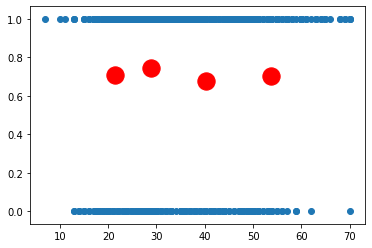

In [54]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [55]:
X

array([[24.,  1.,  7.],
       [53.,  0., 17.],
       [23.,  1., 11.],
       ...,
       [20.,  1., 18.],
       [48.,  0., 12.],
       [22.,  1., 18.]])

In [56]:
Y=users[["age","occupation"]].values

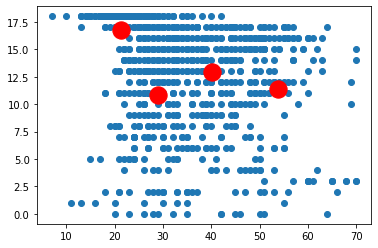

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(Y)
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [58]:
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 

In [59]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(Y) 
X_principal = pd.DataFrame(Y) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

     P1    P2
0  24.0   7.0
1  53.0  17.0
2  23.0  11.0
3  24.0   7.0
4  33.0  17.0


In [60]:

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 

In [61]:
set(labels)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107}

In [62]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [63]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")

param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9634407359171798
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [64]:
#making recommendations based on cosine similarity
ratings_matrix = final_merge.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#Calculating the cosine similarity between movies
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [66]:
#making recommendations
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Close Shave, A (1995)"
    inp=movies[movies['movie_title']==user_inp].index.tolist()
    inp=inp[0]
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(2)
    
except:
    print("Sorry, the movie is not in the database!")


Sorry, the movie is not in the database!


In [67]:
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

NameError: name 'movies' is not defined

In [5]:
?sortby

Object `sortby` not found.
